<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

You are working as a school counselor in the San Diego Unified School District in California. You are tasked to conduct an information session to a group of top-performing high school students from various schools in the district, to provide them with insights on the SAT scores they should achieve to enter their dream colleges and majors.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT is one of the standardized tests that many colleges and universities in the United States require for their admissions process (the other being ACT), and is typically taken during the junior or senior year of high school. The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)), and the total score will then be used as consideration during college admissions. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

Students hoping to snag a position in the most prestigious and outstanding colleges and majors often have to stand out from the other students and the SAT offers an additional consideration to the admissions committee for their level of intellect and academical capabilities. Therefore it is often of utmost importance for aspiring students to undertake the SAT and achieve a high SAT score that will increase their chances of admission into their desired college and majors.

**Chosen datasets**

|Dataset filename|Description|
|---|---|
|sat_2019_by_intended_college_major.csv|Dataset of 2019 SAT scores by test takers and their intended college majors|
|sat_act_by_college.csv|Ranges of accepted ACT & SAT scores by various colleges in the US|

### Outside Research

The top 10 colleges in the US (accessed on 8 January 2022):
- Stanford University
- Harvard College
- Princeton University
- Columbia University
- Yale University
- California Institute of Technology
- Massachusetts Institute of Technology
- University of Chicago
- University of Pennsylvania
- Cornell University
([*source*](https://www.topuniversities.com/university-rankings/world-university-rankings/2021))

The top 5 college majors are:

- Business, Management, Marketing, and Related Support Services
- Communication, Journalism, and Related Programs
- Computer and Information Sciences and Support Services
- English Language and Literature/Letters
- Psychology, General 
([*source*](https://www.princetonreview.com/college-advice/top-ten-college-majors))

In [1]:
# Function for calculating mean

def mean(nums):
    count = 0
    total = 0
    for num in nums:
        count += 1
        total += num
    return total/count

In [2]:
#test function
test_nums = [4,7,13,4,9,22,12,8]
mean(test_nums)

9.875

In [3]:
# Function for calculating standard deviation

def std_dev(nums):
    count = 0
    total = 0
    mean_nums = mean(nums)
    for num in nums:
        count += 1
        total += (num - mean_nums)**2
    return (total/count)**0.5

In [4]:
#test function

std_dev(test_nums)

5.509934210133547

In [5]:
# Function to convert percentage to decimal:

def pct_to_dec(num):
    num = float(num[:-1])
    num = num/100
    return num

In [6]:
#test function

pct_to_dec('30.5%')

0.305

## Data Import and Cleaning

In [7]:
# Library imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
college_df = pd.read_csv('../data/sat_act_by_college.csv')

In [9]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Test Optional?                  416 non-null    object
 2   Applies to Class Year(s)        390 non-null    object
 3   Policy Details                  416 non-null    object
 4   Number of Applicants            416 non-null    int64 
 5   Accept Rate                     416 non-null    object
 6   SAT Total 25th-75th Percentile  416 non-null    object
 7   ACT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.1+ KB


In [10]:
college_df.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [11]:
#drop columns irrelevant to problem statement

college_df.drop(['Test Optional?','Applies to Class Year(s)','Policy Details','ACT Total 25th-75th Percentile'],axis=1, inplace=True)

In [12]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          416 non-null    object
 1   Number of Applicants            416 non-null    int64 
 2   Accept Rate                     416 non-null    object
 3   SAT Total 25th-75th Percentile  416 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.1+ KB


In [13]:
#convert % to prob

college_df['Accept Rate'] = college_df['Accept Rate'].apply(pct_to_dec)

In [14]:
#fix data in sat pct col

college_df['SAT Total 25th-75th Percentile'] = college_df['SAT Total 25th-75th Percentile'].apply(lambda x:x.replace('\u200b\u200b ',''))
college_df.drop(college_df[college_df['SAT Total 25th-75th Percentile']=='--'].index, inplace=True)

In [15]:
#split sat 25-75 percentile col to 25 and 75 cols

college_df['SAT Total 25th Percentile'] = college_df['SAT Total 25th-75th Percentile'].apply(lambda x:x.split('-')[0])
college_df['SAT Total 75th Percentile'] = college_df['SAT Total 25th-75th Percentile'].apply(lambda x:x.split('-')[1])

In [16]:
#remove cols with duplicate data

college_df.drop(['SAT Total 25th-75th Percentile'],axis=1,inplace=True)

In [17]:
#rename columns

college_df.columns = college_df.columns.str.lower()
college_df.columns = college_df.columns.str.replace(' ','_')

In [18]:
#converts percentile cols to float

college_df[['sat_total_25th_percentile','sat_total_75th_percentile']] = college_df[['sat_total_25th_percentile','sat_total_75th_percentile']].apply(lambda x:x.astype(float))

In [19]:
college_df.head(20)

,school,number_of_applicants,accept_rate,sat_total_25th_percentile,sat_total_75th_percentile
0,Stanford University,47452,0.043,1440.0,1570.0
1,Harvard College,42749,0.047,1460.0,1580.0
2,Princeton University,35370,0.055,1440.0,1570.0
3,Columbia University,40203,0.055,1450.0,1560.0
4,Yale University,36844,0.061,1460.0,1570.0
5,California Institute of Technology,8367,0.064,1530.0,1560.0
6,Massachusetts Institute of Technology,21706,0.067,1500.0,1570.0
7,Brown University,38674,0.071,1440.0,1570.0
8,University of Chicago,32283,0.073,1490.0,1570.0
9,Pomona College,10401,0.074,1390.0,1540.0


In [20]:
#New column to classify if college belongs to top ten

college_df['top_ten'] = 'no'
college_df['top_ten'].iloc[[0,1,2,3,4,5,6,8,10,19]] = 'yes'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
college_df.head()

,school,number_of_applicants,accept_rate,sat_total_25th_percentile,sat_total_75th_percentile,top_ten
0,Stanford University,47452,0.043,1440.0,1570.0,yes
1,Harvard College,42749,0.047,1460.0,1580.0,yes
2,Princeton University,35370,0.055,1440.0,1570.0,yes
3,Columbia University,40203,0.055,1450.0,1560.0,yes
4,Yale University,36844,0.061,1460.0,1570.0,yes


In [22]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 415
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   school                     410 non-null    object 
 1   number_of_applicants       410 non-null    int64  
 2   accept_rate                410 non-null    float64
 3   sat_total_25th_percentile  410 non-null    float64
 4   sat_total_75th_percentile  410 non-null    float64
 5   top_ten                    410 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 22.4+ KB


In [23]:
major_df = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')

In [24]:
pd.set_option('display.max_colwidth', None)
major_df.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Related Sciences","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related Support Services","221,523",12%,1072,534,537


In [25]:
major_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IntendedCollegeMajor  38 non-null     object
 1   TestTakers            38 non-null     object
 2   Percent               38 non-null     object
 3   Total                 38 non-null     int64 
 4   ReadingWriting        38 non-null     int64 
 5   Math                  38 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


In [26]:
#rename columns

major_df.columns = major_df.columns.str.lower()
major_df.rename(columns={'percent':'proportion'}, inplace=True)

In [27]:
#converts testtakers col to int

major_df['testtakers'] = major_df['testtakers'].apply(lambda x:x.replace(',',''))
major_df[['testtakers']] = major_df[['testtakers']].apply(lambda x:x.astype(int))

In [28]:
major_df[['total','readingwriting','math']] = major_df[['total','readingwriting','math']].apply(lambda x:x.astype(float))

In [29]:
#convert % to prob

major_df['proportion'] = major_df['proportion'].apply(pct_to_dec)

In [30]:
major_df

,intendedcollegemajor,testtakers,proportion,total,readingwriting,math
0,"Agriculture, AgricultureOperations, and Related Sciences",24913,0.01,977.0,496.0,481.0
1,Architecture and Related Services,28988,0.02,1047.0,520.0,527.0
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040.0,536.0,504.0
3,Biological and Biomedical Sciences,155834,0.08,1139.0,572.0,566.0
4,"Business, Management, Marketing, and Related Support Services",221523,0.12,1072.0,534.0,537.0
5,"Communication, Journalism, and Related Programs",36332,0.02,1069.0,550.0,519.0
6,Computer and Information Sciences and Support Services,79736,0.04,1156.0,571.0,585.0
7,"Construction Trades, General",2500,0.00,919.0,459.0,460.0
8,Education,71882,0.04,1022.0,519.0,503.0
9,Engineering,194127,0.11,1139.0,559.0,581.0


In [31]:
major_df['top_five'] = 'no'
major_df['top_five'].iloc[[4,5,6,11,29]] = 'yes'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [32]:
pd.set_option('display.max_colwidth', None)
major_df

,intendedcollegemajor,testtakers,proportion,total,readingwriting,math,top_five
0,"Agriculture, AgricultureOperations, and Related Sciences",24913,0.01,977.0,496.0,481.0,no
1,Architecture and Related Services,28988,0.02,1047.0,520.0,527.0,no
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040.0,536.0,504.0,no
3,Biological and Biomedical Sciences,155834,0.08,1139.0,572.0,566.0,no
4,"Business, Management, Marketing, and Related Support Services",221523,0.12,1072.0,534.0,537.0,yes
5,"Communication, Journalism, and Related Programs",36332,0.02,1069.0,550.0,519.0,yes
6,Computer and Information Sciences and Support Services,79736,0.04,1156.0,571.0,585.0,yes
7,"Construction Trades, General",2500,0.00,919.0,459.0,460.0,no
8,Education,71882,0.04,1022.0,519.0,503.0,no
9,Engineering,194127,0.11,1139.0,559.0,581.0,no


In [33]:
major_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   intendedcollegemajor  38 non-null     object 
 1   testtakers            38 non-null     int64  
 2   proportion            38 non-null     float64
 3   total                 38 non-null     float64
 4   readingwriting        38 non-null     float64
 5   math                  38 non-null     float64
 6   top_five              38 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.2+ KB


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|school|object|Ranges of Accepted ACT & SAT Student Scores by Colleges|College|
|number_of_applicants|int|Ranges of Accepted ACT & SAT Student Scores by Colleges|Number of applicants for the college|
|accept_rate|float|Ranges of Accepted ACT & SAT Student Scores by Colleges|Proportion of applicants accepted into the college|
|sat_total_25th_percentile|float|Ranges of Accepted ACT & SAT Student Scores by Colleges|SAT score in which 25% of applicants scored below this score|
|sat_total_75th_percentile|float|Ranges of Accepted ACT & SAT Student Scores by Colleges|SAT score in which 75% of applicants scored below this score|
|top_ten|object|Ranges of Accepted ACT & SAT Student Scores by Colleges|Whether the college belongs to top ten in terms of acceptance rate|
|intendedcollegemajor|object|2019 SAT Scores by Intended College Major|College major in which SAT test takers intend to apply to|
|testtakers|int|2019 SAT Scores by Intended College Major|Number of SAT test takers|
|proportion|float|2019 SAT Scores by Intended College Major|Proportion of SAT test takers, from a total number of 2.2 million test takers|
|total|float|2019 SAT Scores by Intended College Major|Mean total score of SAT test takers by intended college major|
|readingwriting|float|2019 SAT Scores by Intended College Major|Mean score for Evidence-based Reading and Writing score by intended college major|
|math|float|2019 SAT Scores by Intended College Major|Mean score for Math score by intended college major|
|top_five|object|2019 SAT Scores by Intended College Major|Whether the college major belongs to top five in terms of mean total SAT score|

## Exploratory Data Analysis

In [34]:
college_df.head()

,school,number_of_applicants,accept_rate,sat_total_25th_percentile,sat_total_75th_percentile,top_ten
0,Stanford University,47452,0.043,1440.0,1570.0,yes
1,Harvard College,42749,0.047,1460.0,1580.0,yes
2,Princeton University,35370,0.055,1440.0,1570.0,yes
3,Columbia University,40203,0.055,1450.0,1560.0,yes
4,Yale University,36844,0.061,1460.0,1570.0,yes


In [35]:
#Descriptive statistics for SAT scores by colleges

college_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_applicants,410.0,17586.614634,17533.678784,211.000,5374.50000,11715.5000,24046.750,111322.000
accept_rate,410.0,0.553344,0.241454,0.043,0.36875,0.6095,0.741,0.999
sat_total_25th_percentile,410.0,1167.008537,129.586121,793.000,1070.00000,1150.0000,1250.000,1530.000
sat_total_75th_percentile,410.0,1358.892683,111.431443,1050.000,1270.00000,1350.0000,1440.000,1580.000


In [36]:
#Std dev of SAT scores by colleges

sd_college = dict(zip(college_df.drop(['school','top_ten'],axis=1).columns, college_df.drop(['school','top_ten'],axis=1).apply(std_dev,axis=0)))
sd_college

{'number_of_applicants': 17512.283194814878,
 'accept_rate': 0.2411598625229497,
 'sat_total_25th_percentile': 129.4279931658202,
 'sat_total_75th_percentile': 111.29546785908504}

In [37]:
pd.set_option('display.max_colwidth', None)
major_df.head()

,intendedcollegemajor,testtakers,proportion,total,readingwriting,math,top_five
0,"Agriculture, AgricultureOperations, and Related Sciences",24913,0.01,977.0,496.0,481.0,no
1,Architecture and Related Services,28988,0.02,1047.0,520.0,527.0,no
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040.0,536.0,504.0,no
3,Biological and Biomedical Sciences,155834,0.08,1139.0,572.0,566.0,no
4,"Business, Management, Marketing, and Related Support Services",221523,0.12,1072.0,534.0,537.0,yes


In [38]:
#Descriptive statistics for SAT scores by college majors

major_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
testtakers,38.0,48394.500000,72753.092558,283.0,6611.00,16370.50,60215.750,331026.00
proportion,38.0,0.025789,0.039975,0.0,0.00,0.01,0.035,0.18
total,38.0,1058.500000,82.445969,916.0,988.25,1066.50,1115.500,1242.00
readingwriting,38.0,535.500000,41.362439,458.0,501.25,537.00,569.750,597.00
math,38.0,523.000000,43.386385,456.0,486.50,527.00,542.250,646.00


In [39]:
#Std dev for SAT scores by college majors

sd_major = dict(zip(major_df.drop(['intendedcollegemajor','top_five'],axis=1).columns, major_df.drop(['intendedcollegemajor','top_five'],axis=1).apply(std_dev,axis=0)))
sd_major

{'testtakers': 71789.43289002257,
 'proportion': 0.03944560404747735,
 'total': 81.35392139482761,
 'readingwriting': 40.814567832679806,
 'math': 42.811705236572365}

In [40]:
college_df[college_df['accept_rate'] < 0.1].head()

,school,number_of_applicants,accept_rate,sat_total_25th_percentile,sat_total_75th_percentile,top_ten
0,Stanford University,47452,0.043,1440.0,1570.0,yes
1,Harvard College,42749,0.047,1460.0,1580.0,yes
2,Princeton University,35370,0.055,1440.0,1570.0,yes
3,Columbia University,40203,0.055,1450.0,1560.0,yes
4,Yale University,36844,0.061,1460.0,1570.0,yes


In [41]:
college_df[college_df['accept_rate'] < 0.1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_applicants,18.0,29634.888889,13431.978913,8367.000,17675.50000,35568.5000,39820.75000,47452.000
accept_rate,18.0,0.072056,0.015360,0.043,0.06175,0.0735,0.08675,0.091
sat_total_25th_percentile,18.0,1432.777778,65.512060,1240.000,1440.00000,1445.0000,1460.00000,1530.000
sat_total_75th_percentile,18.0,1557.777778,17.339365,1520.000,1552.50000,1560.0000,1570.00000,1580.000


In [42]:
college_df[college_df['accept_rate'] >= 0.1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_applicants,392.0,17033.377551,17514.250125,211.000,5118.00000,11181.0000,22756.25000,111322.000
accept_rate,392.0,0.575444,0.223205,0.103,0.40625,0.6205,0.74625,0.999
sat_total_25th_percentile,392.0,1154.804847,118.228801,793.000,1070.00000,1141.2500,1240.00000,1490.000
sat_total_75th_percentile,392.0,1349.760204,105.218558,1050.000,1270.00000,1340.0000,1430.00000,1570.000


In [43]:
print(f"Mean number of applicants to colleges with <10% acceptance rate as compared to other colleges: {round(29635/17033*100)}%")
print(f"25th percentile mean SAT scores for colleges with <10% acceptance rate as compared to other colleges: {round(1433/1155*100)}%")
print(f"75th percentile mean SAT scores for colleges with <10% acceptance rate as compared to other colleges: {round(1558/1350*100)}%")

Mean number of applicants to colleges with <10% acceptance rate as compared to other colleges: 174%
25th percentile mean SAT scores for colleges with <10% acceptance rate as compared to other colleges: 124%
75th percentile mean SAT scores for colleges with <10% acceptance rate as compared to other colleges: 115%


In [44]:
college_df[college_df['top_ten'] == 'yes']

,school,number_of_applicants,accept_rate,sat_total_25th_percentile,sat_total_75th_percentile,top_ten
0,Stanford University,47452,0.043,1440.0,1570.0,yes
1,Harvard College,42749,0.047,1460.0,1580.0,yes
2,Princeton University,35370,0.055,1440.0,1570.0,yes
3,Columbia University,40203,0.055,1450.0,1560.0,yes
4,Yale University,36844,0.061,1460.0,1570.0,yes
5,California Institute of Technology,8367,0.064,1530.0,1560.0,yes
6,Massachusetts Institute of Technology,21706,0.067,1500.0,1570.0,yes
8,University of Chicago,32283,0.073,1490.0,1570.0,yes
10,University of Pennsylvania,44961,0.077,1450.0,1560.0,yes
19,Cornell University,49114,0.109,1400.0,1560.0,yes


In [45]:
college_df[college_df['top_ten'] == 'yes'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_applicants,10.0,35904.9000,12602.358866,8367.000,33054.750,38523.5000,44408.0000,49114.000
accept_rate,10.0,0.0651,0.018776,0.043,0.055,0.0625,0.0715,0.109
sat_total_25th_percentile,10.0,1462.0000,36.453928,1400.000,1442.500,1455.0000,1482.5000,1530.000
sat_total_75th_percentile,10.0,1567.0000,6.749486,1560.000,1560.000,1570.0000,1570.0000,1580.000


In [46]:
college_df[college_df['top_ten'] == 'no'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_applicants,400.0,17128.65750,17404.948810,211.000,5200.750,11353.5000,22881.25000,111322.000
accept_rate,400.0,0.56555,0.231581,0.071,0.388,0.6165,0.74225,0.999
sat_total_25th_percentile,400.0,1159.63375,122.261928,793.000,1070.000,1150.0000,1240.00000,1490.000
sat_total_75th_percentile,400.0,1353.69000,107.770939,1050.000,1270.000,1350.0000,1440.00000,1570.000


In [47]:
print(f"Mean number of applicants to top 10 colleges as compared to other colleges: {round(35905/17129*100)}%")
print(f"25th percentile mean SAT scores for top 10 colleges as compared to other colleges: {round(1462/1160*100)}%")
print(f"75th percentile mean SAT scores for top 10 colleges as compared to other colleges: {round(1567/1354*100)}%")

Mean number of applicants to top 10 colleges as compared to other colleges: 210%
25th percentile mean SAT scores for top 10 colleges as compared to other colleges: 126%
75th percentile mean SAT scores for top 10 colleges as compared to other colleges: 116%


In [48]:
pd.set_option('display.max_colwidth', None)
major_df.head()

,intendedcollegemajor,testtakers,proportion,total,readingwriting,math,top_five
0,"Agriculture, AgricultureOperations, and Related Sciences",24913,0.01,977.0,496.0,481.0,no
1,Architecture and Related Services,28988,0.02,1047.0,520.0,527.0,no
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040.0,536.0,504.0,no
3,Biological and Biomedical Sciences,155834,0.08,1139.0,572.0,566.0,no
4,"Business, Management, Marketing, and Related Support Services",221523,0.12,1072.0,534.0,537.0,yes


In [49]:
major_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
testtakers,38.0,48394.500000,72753.092558,283.0,6611.00,16370.50,60215.750,331026.00
proportion,38.0,0.025789,0.039975,0.0,0.00,0.01,0.035,0.18
total,38.0,1058.500000,82.445969,916.0,988.25,1066.50,1115.500,1242.00
readingwriting,38.0,535.500000,41.362439,458.0,501.25,537.00,569.750,597.00
math,38.0,523.000000,43.386385,456.0,486.50,527.00,542.250,646.00


In [50]:
pd.set_option('display.max_colwidth', None)
major_df.sort_values('testtakers', ascending=False).head(5)

,intendedcollegemajor,testtakers,proportion,total,readingwriting,math,top_five
14,Health Professions and related Clinical Sciences,331026,0.18,1048.0,529.0,518.0,no
4,"Business, Management, Marketing, and Related Support Services",221523,0.12,1072.0,534.0,537.0,yes
9,Engineering,194127,0.11,1139.0,559.0,581.0,no
3,Biological and Biomedical Sciences,155834,0.08,1139.0,572.0,566.0,no
35,"Visual and Performing Arts, General",130642,0.07,1045.0,536.0,510.0,no


In [51]:
major_df.sort_values('testtakers', ascending=False).head(5).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
testtakers,5.0,206630.400,77792.835520,130642.00,155834.00,194127.00,221523.00,331026.00
proportion,5.0,0.112,0.043243,0.07,0.08,0.11,0.12,0.18
total,5.0,1088.600,47.183684,1045.00,1048.00,1072.00,1139.00,1139.00
readingwriting,5.0,546.000,18.560711,529.00,534.00,536.00,559.00,572.00
math,5.0,542.400,30.500820,510.00,518.00,537.00,566.00,581.00


In [52]:
print(f'Mean number of test takers for top 5 most popular college majors as compared to other majors: {round(206630/48395*100)}%')
print(f'Mean total SAT score for top 5 most popular college majors as compared to other majors: {round(1089/1059*100)}%')

Mean number of test takers for top 5 most popular college majors as compared to other majors: 427%
Mean total SAT score for top 5 most popular college majors as compared to other majors: 103%


In [53]:
major_df[major_df['top_five'] == 'yes']

,intendedcollegemajor,testtakers,proportion,total,readingwriting,math,top_five
4,"Business, Management, Marketing, and Related Support Services",221523,0.12,1072.0,534.0,537.0,yes
5,"Communication, Journalism, and Related Programs",36332,0.02,1069.0,550.0,519.0,yes
6,Computer and Information Sciences and Support Services,79736,0.04,1156.0,571.0,585.0,yes
11,English Language and Literature/Letters,16233,0.01,1119.0,585.0,533.0,yes
29,"Psychology, General",75626,0.04,1064.0,546.0,518.0,yes


In [54]:
major_df[major_df['top_five'] == 'yes'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
testtakers,5.0,85890.000,80385.983097,16233.00,36332.00,75626.00,79736.00,221523.00
proportion,5.0,0.046,0.043359,0.01,0.02,0.04,0.04,0.12
total,5.0,1096.000,40.180841,1064.00,1069.00,1072.00,1119.00,1156.00
readingwriting,5.0,557.200,20.486581,534.00,546.00,550.00,571.00,585.00
math,5.0,538.400,27.364210,518.00,519.00,533.00,537.00,585.00


In [55]:
major_df[major_df['top_five'] == 'no'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
testtakers,33.0,42713.363636,71129.105479,283.0,6469.0,12611.00,33595.00,331026.00
proportion,33.0,0.022727,0.039233,0.0,0.0,0.01,0.02,0.18
total,33.0,1052.818182,86.049933,916.0,977.0,1047.00,1105.00,1242.00
readingwriting,33.0,532.212121,42.906699,458.0,496.0,536.00,566.00,597.00
math,33.0,520.666667,45.168896,456.0,481.0,527.00,543.00,646.00


In [56]:
print(f'Mean number of test takers for top 5 college majors as compared to other majors: {round(85890/42713*100)}%')
print(f'Mean total SAT score for top 5 college majors as compared to other majors: {round(1096/1053*100)}%')

Mean number of test takers for top 5 college majors as compared to other majors: 201%
Mean total SAT score for top 5 college majors as compared to other majors: 104%


**Findings on trends in the data (step 3 above).**

The mean number of applicants for colleges with less than 10% acceptance rate is 174% that of the other colleges. The mean 25th and 75th percentile score for these colleges were also 124% and 115% respectively to the other colleges in US.

The number of applicants to the top 10 colleges was 210% that of the other colleges. The 25th and 75th percentile mean total SAT score were 126% and 116% respectively for applicants entering these colleges as compared to the other colleges.

College majors with the most SAT test takers are (by order):
- Health Professions and related Clinical Sciences
- Business, Management, Marketing, and Related Support Services
- Engineering
- Biological and Biomedical Sciences
- Visual and Performing Arts, General

The mean number of test takers for the top 5 most popular college majors by SAT test takers was 427% of the other college majors. The mean total SAT score for these 5 college majors was 103% of the SAT score from the other college majors.

The mean number of test takers for the top 5 college majors was 201% of the other college majors. The mean total SAT score for these 5 college majors was 104% of the other college majors.

## Data Visualization

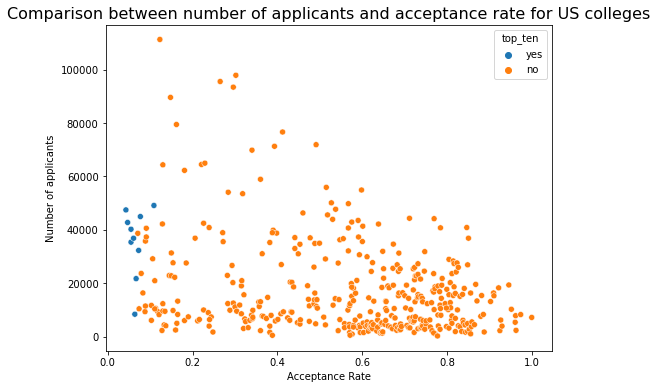

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=college_df, x='accept_rate', y='number_of_applicants', hue='top_ten')

plt.title('Comparison between number of applicants and acceptance rate for US colleges', fontsize=16)
plt.xlabel('Acceptance Rate')
plt.ylabel('Number of applicants');

From the scatter plot we notice a trend that as college acceptance rate increases, the variability in the number of applicants decreased. 

For colleges with high acceptance rates, the number of applicants was low for those colleges with similar numbers. For colleges with low acceptance rate, while there was a higher tendency to have a relatively low number of applicants, there were some colleges that had high number of applicants.

It is interesting to note that for the top 10 colleges(in blue), while they expectedly had the lowest acceptance rate, the number of applicants varied in the range of 10000 to 50000 applicants which were not amongst the colleges that had the highest number of applicants.

In [58]:
college_df.head()

,school,number_of_applicants,accept_rate,sat_total_25th_percentile,sat_total_75th_percentile,top_ten
0,Stanford University,47452,0.043,1440.0,1570.0,yes
1,Harvard College,42749,0.047,1460.0,1580.0,yes
2,Princeton University,35370,0.055,1440.0,1570.0,yes
3,Columbia University,40203,0.055,1450.0,1560.0,yes
4,Yale University,36844,0.061,1460.0,1570.0,yes


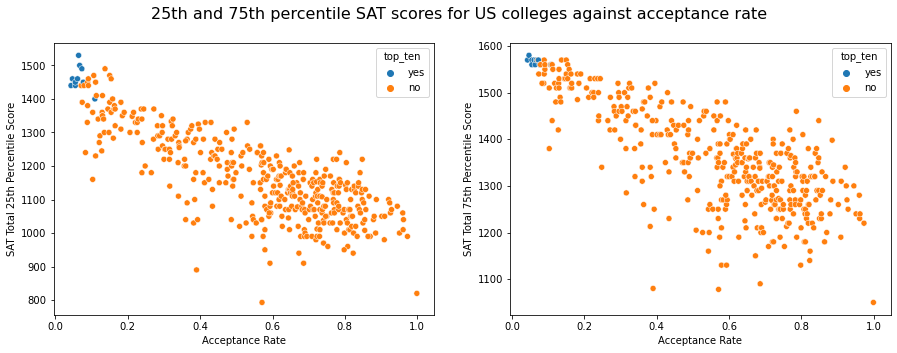

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.scatterplot(data=college_df, x='accept_rate', y='sat_total_25th_percentile', hue='top_ten', ax=ax[0])
sns.scatterplot(data=college_df, x='accept_rate', y='sat_total_75th_percentile', hue='top_ten', ax=ax[1])

plt.suptitle('25th and 75th percentile SAT scores for US colleges against acceptance rate', fontsize=16)

ax[0].set_xlabel('Acceptance Rate')
ax[0].set_ylabel('SAT Total 25th Percentile Score')

ax[1].set_xlabel('Acceptance Rate')
ax[1].set_ylabel('SAT Total 75th Percentile Score');

There is a negative linear correlation between SAT scores and college acceptance rate. As acceptance rate for colleges decreases, the SAT scores for the 25th and 75th percentiles of enrolled students increases.

The 25th and 75th percentile of SAT scores for enrolled students in the top 10 colleges were amongst the highest  as compared to the other colleges.

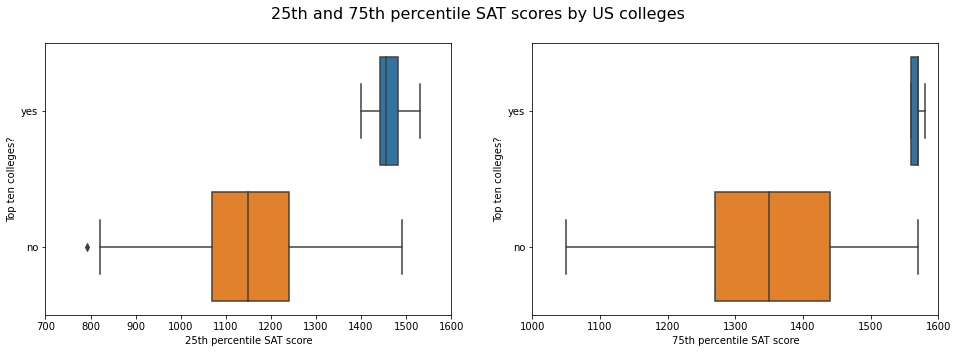

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.boxplot(data=college_df, x='sat_total_25th_percentile', y='top_ten', ax=ax[0])
sns.boxplot(data=college_df, x='sat_total_75th_percentile', y='top_ten', ax=ax[1])

plt.suptitle('25th and 75th percentile SAT scores by US colleges', fontsize=16)

ax[0].set_xlabel('25th percentile SAT score')
ax[0].set_ylabel('Top ten colleges?')

ax[1].set_xlabel('75th percentile SAT score')
ax[1].set_ylabel('Top ten colleges?')

ax[0].set_xlim(700,1600)
ax[1].set_xlim(1000,1600);

The above boxplots illustrate the range of 25th and 75th percentile of SAT scores of enrolled students in US colleges.

The 25th and 75th percentile SAT scores for the top 10 colleges were way much higher as compared to the other colleges, as seen by the huge gap between the boxplot body(interquartile range).

In [61]:
major_df.head()

,intendedcollegemajor,testtakers,proportion,total,readingwriting,math,top_five
0,"Agriculture, AgricultureOperations, and Related Sciences",24913,0.01,977.0,496.0,481.0,no
1,Architecture and Related Services,28988,0.02,1047.0,520.0,527.0,no
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040.0,536.0,504.0,no
3,Biological and Biomedical Sciences,155834,0.08,1139.0,572.0,566.0,no
4,"Business, Management, Marketing, and Related Support Services",221523,0.12,1072.0,534.0,537.0,yes


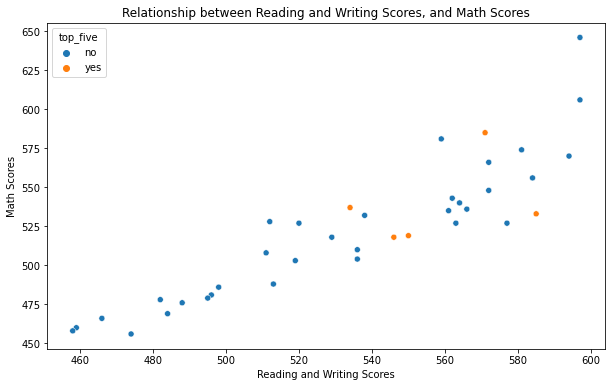

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=major_df, x='readingwriting', y='math', hue='top_five')

plt.xlabel('Reading and Writing Scores')
plt.ylabel('Math Scores')

plt.title('Relationship between Reading and Writing Scores, and Math Scores');

The scatter plot suggests a clear positive correlation between mean reading and writing scores and the mean math scores amongst test takers who intended to apply to the various college majors. As the reading and writing scores by the test takers increase, the math scores increase as well.

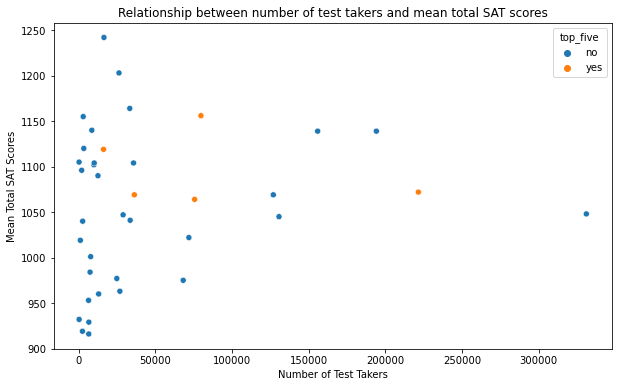

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=major_df, x='testtakers', y='total',hue='top_five')

plt.xlabel('Number of Test Takers')
plt.ylabel('Mean Total SAT Scores')

plt.title('Relationship between number of test takers and mean total SAT scores');

*Interpretation:*

For college majors that had lower number of test takers, the mean total SAT scores of these college majors varied widely with no obvious bias, whereas college majors which had higher number of test takers had mean total SAT scores that varied less and belonged nearer to the center of the scores range.

In [64]:
major_df.head()

,intendedcollegemajor,testtakers,proportion,total,readingwriting,math,top_five
0,"Agriculture, AgricultureOperations, and Related Sciences",24913,0.01,977.0,496.0,481.0,no
1,Architecture and Related Services,28988,0.02,1047.0,520.0,527.0,no
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040.0,536.0,504.0,no
3,Biological and Biomedical Sciences,155834,0.08,1139.0,572.0,566.0,no
4,"Business, Management, Marketing, and Related Support Services",221523,0.12,1072.0,534.0,537.0,yes


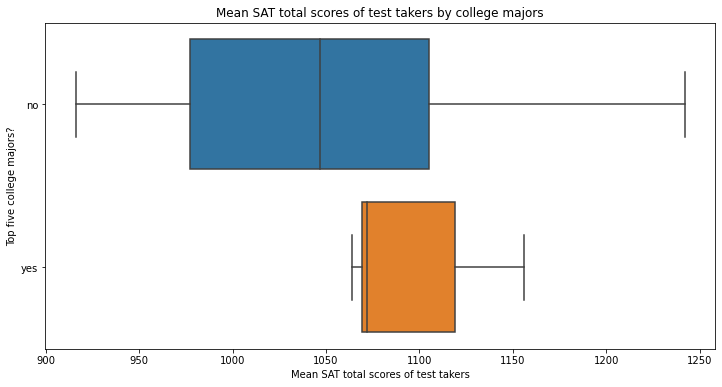

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=major_df, x='total',y='top_five')

plt.xlabel('Mean SAT total scores of test takers')
plt.ylabel('Top five college majors?')

plt.title('Mean SAT total scores of test takers by college majors');

The above boxplot shows the range of SAT scores of test takers by college majors. The mean total SAT score for the top 5 college majors were slightly higher than the mean total SAT scores for the other college majors, and that the scores for the top 5 college majors were higher than the median of the other college majors.

## Conclusions and Recommendations

The top 10 colleges expectedly accepted SAT scores that were the highest amongst the other colleges. The data showed that the 25th percentile of mean total SAT score for the top 10 colleges were in the approximate range of 1400-1500, and students vying for a spot in these colleges could use this information as a rough gauge. Aspiring students are recommended to obtain a score of at least 1400 during their revision to have a decent chance of obtaining admission.

The top 5 college majors with test takers of the highest mean total SAT scores were in the approximate range of 1150-1250, and students that are interested to undertake these college majors could gauge their readiness from their scores during revision. However, we recommend students to undertake the college major based on their passion instead of looking at the SAT scores required to enter and that this information was meant for comparison purposes.